In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import sys
#sys.path.insert(0, '/home/btannenw/Desktop/ML/dihiggsMLProject/')
#from utils.commonFunctions import *

In [3]:
csv_hh = '/home/btannenw/Desktop/ML/dihiggsMLProject/data/pp2hh4b_500kEvents_0PU_v2-05_combined_csv.csv'
csv_qcd = '/home/btannenw/Desktop/ML/dihiggsMLProject/data/ppTo4b_2MEvents_0PU_v2-05_combined_csv.csv'

In [4]:
df_hh= pd.read_csv( csv_hh )

In [5]:
df_qcd= pd.read_csv( csv_qcd )

(array([0.0000e+00, 1.0000e+00, 1.0000e+00, 2.4000e+01, 1.4300e+02,
        4.2700e+02, 1.1600e+03, 2.4930e+03, 4.6360e+03, 7.4550e+03,
        1.1048e+04, 1.3988e+04, 1.6067e+04, 1.6983e+04, 1.6518e+04,
        1.5108e+04, 1.3528e+04, 1.1825e+04, 1.0483e+04, 9.0540e+03,
        7.8180e+03, 6.5700e+03, 5.8100e+03, 4.9940e+03, 4.4530e+03,
        3.8000e+03, 3.4270e+03, 3.0040e+03, 2.6690e+03, 2.3350e+03,
        2.0780e+03, 1.8440e+03, 1.6660e+03, 1.5180e+03, 1.3370e+03,
        1.2400e+03, 1.0990e+03, 1.0310e+03, 8.4400e+02, 8.2100e+02,
        7.1400e+02, 6.6800e+02, 5.5400e+02, 5.3200e+02, 4.9700e+02,
        4.5000e+02, 4.1500e+02, 3.6800e+02, 3.7800e+02, 3.4500e+02,
        2.6900e+02, 2.8100e+02, 2.3200e+02, 2.3800e+02, 2.3200e+02,
        1.9200e+02, 1.7800e+02, 1.8500e+02, 1.6100e+02]),
 array([   0,   25,   50,   75,  100,  125,  150,  175,  200,  225,  250,
         275,  300,  325,  350,  375,  400,  425,  450,  475,  500,  525,
         550,  575,  600,  625,  650,  675,  7

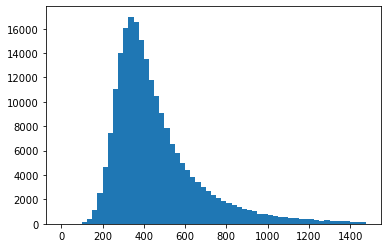

In [6]:
plt.hist(df_hh.hh_mass, bins=np.arange(0,1500,25))

In [60]:
def compareManyHistograms( _dict, _labels, _nPlot, _title, _xtitle, _ytitle, _xMin, _xMax, _nBins, _yMax = 4000, _normed=False, savePlot=False, saveDir='', writeSignificance=False, _testingFraction=1.0, nQCD=-1, nDihiggs=-1):
       
    if len(_dict.keys()) < len(_labels):
        print ("!!! Unequal number of arrays and labels. Learn to count better.")
        return 0
    
    plt.figure(_nPlot)
    if _normed:
        plt.title(_title + ' (Normalized)')
    else:
        plt.title(_title)
    plt.xlabel(_xtitle)
    plt.ylabel('{} [A.U.]'.format(_ytitle))
    _bins = np.linspace(_xMin, _xMax, _nBins)

    
    for iLabel in _labels:
        if _normed:
            _weights = np.ones_like(_dict[iLabel]) / len(_dict[iLabel])
            _counts_final, _bins_final, _patches_final = plt.hist(_dict[iLabel], bins=_bins, weights=_weights, alpha=0.5, label= iLabel+' Events')
            #print(sum(_dict[iLabel]*_weights), sum(_counts_final))
            
        else:
            plt.hist(_dict[iLabel], bins=_bins, alpha=0.5, label= iLabel+' Events')
                    

    # set max y-value of histogram so there's room for legend
    #_yMax = 0.20 if _normed else _yMax
    axes = plt.gca()
    axes.set_ylim([0,_yMax])
        
    #draw legend
    plt.legend(loc='upper right')
    #plt.text(.1, .1, s1)
    
    # ** X. Add significance and cut if requested
    sig, cut, err = 0, 0, 0
    if writeSignificance==True:
        _pred_sig = _dict['hh_pred']
        _pred_bkg = _dict['qcd_pred']
        if nDihiggs==-1 and nQCD==-1:
            sig, cut, err = returnBestCutValue(_xtitle, _pred_sig.copy(), _pred_bkg.copy(), _minBackground=200, _testingFraction=_testingFraction)
        else:
            sig, cut, err = returnBestCutValue(_xtitle, _pred_sig.copy(), _pred_bkg.copy(), _minBackground=200, _testingFraction=_testingFraction, hh_nEventsGen= nDihiggs, qcd_nEventsGen= nQCD)
        plt.text(x=0.6, y=0.12, s= '$\sigma$ = {} $\pm$ {}\n (score > {})'.format(round(sig, 2), round(err, 2), round(cut, 3)), fontsize=13 )

    # store figure copy for later saving
    fig = plt.gcf()
    
    # draw interactively
    plt.show()
    
    #save an image file
    if(savePlot):
        _scope    = _title.split(' ')[0].lower()
        _variable = _xtitle.lstrip('Jet Pair').replace(' ','').replace('[GeV]','').replace('(','_').replace(')','')
        _filename  = _scope + '_' + _variable
        if _normed:
            _filename = _filename + '_norm'
        fig.savefig( saveDir + '/' + _filename+'.png', bbox_inches='tight' )
    
    #close out
    plt.close(fig)
        
    return sig, cut, err



def plotFunc( hh, qcd, var, title, xlabel, ylabel, xmin, xmax, xbin, ymax):
    
    distros = {'Dihiggs':hh[var], 'QCD':qcd[var],}
    compareManyHistograms( distros, ['Dihiggs', 'QCD'], 1, title, xlabel, ylabel, xmin, xmax, xbin, _yMax=ymax, _normed=True, savePlot=True, saveDir='recoPlots_08-21-20' )

    #nbins = np.arange(xmin, xmax, xbin)
    #plt.hist(df_hh[var], bins=nbins, alpha=0.5)
    #plt.hist(df_qcd[var], bins=nbins, alpha=0.5)
    #plt.xlabel( xlabel)
    #plt.ylabel( ylabel)
    

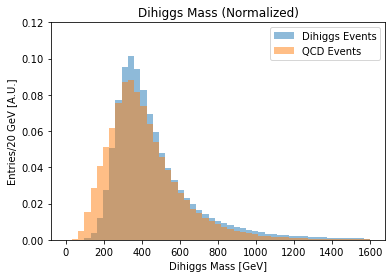

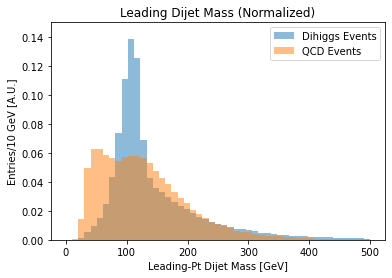

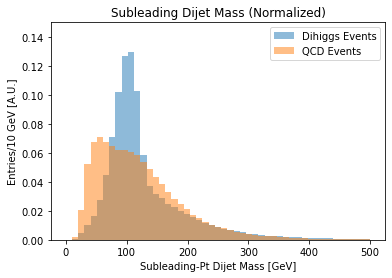

In [61]:
plotFunc( df_hh, df_qcd, 'hh_mass', 'Dihiggs Mass', 'Dihiggs Mass [GeV]', 'Entries/20 GeV', 0, 1600, 50, ymax = .12)
plotFunc( df_hh, df_qcd, 'h1_mass', 'Leading Dijet Mass', 'Leading-Pt Dijet Mass [GeV]', 'Entries/10 GeV', 0, 500, 50, ymax=0.15)
plotFunc( df_hh, df_qcd, 'h2_mass', 'Subleading Dijet Mass', 'Subleading-Pt Dijet Mass [GeV]', 'Entries/10 GeV', 0, 500, 50, ymax=0.15)


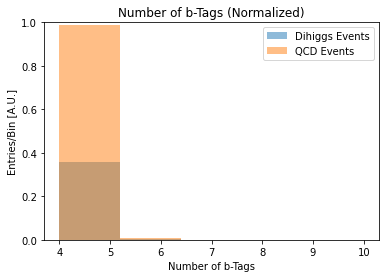

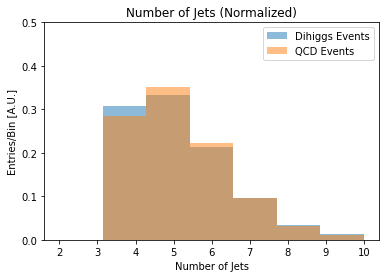

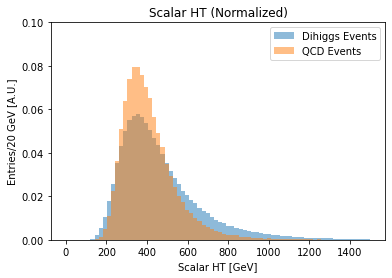

In [76]:
plotFunc( df_hh, df_qcd, 'nBTags', 'Number of b-Tags', 'Number of b-Tags', 'Entries/Bin', 4, 10, 6, ymax=1.)
plotFunc( df_hh, df_qcd, 'nJets', 'Number of Jets', 'Number of Jets', 'Entries/Bin', 2, 10, 8, ymax=.5)
plotFunc( df_hh, df_qcd, 'scalarHT', 'Scalar HT', 'Scalar HT [GeV]', 'Entries/20 GeV', 0, 1500, 75, ymax=.1)

In [77]:
df_hh.columns

Index(['hh_mass', 'h1_mass', 'h2_mass', 'hh_pt', 'h1_pt', 'h2_pt',
       'deltaR(h1, h2)', 'deltaR(h1 jets)', 'deltaR(h2 jets)',
       'deltaPhi(h1, h2)',
       ...
       'gen3_eta', 'gen4_eta', 'gen1_phi', 'gen2_phi', 'gen3_phi', 'gen4_phi',
       'gen1_mass', 'gen2_mass', 'gen3_mass', 'gen4_mass'],
      dtype='object', length=168)

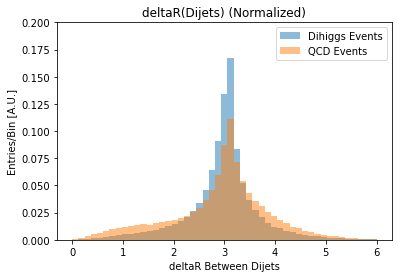

In [82]:
plotFunc( df_hh, df_qcd, 'deltaR(h1, h2)', 'deltaR(Dijets)', 'deltaR Between Dijets', 'Entries/Bin', 0, 6, 50, ymax=.2)

In [ ]:
plotFunc( df_hh, df_qcd, 'deltaR(h1 jets)', 'deltaR(Dijets)', 'deltaR Between Dijets', 'Entries/Bin', 0, 8, 50, ymax=.2)